# Supervised Machine Learning Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning and scatterplot creation
#### 3. Data prep for regression analysis
#### 4. Regression analysis


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


In [3]:
%matplotlib inline

In [4]:
# Define path

path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 6 - Advanced Analytics and Dashboard Design/COVID-19 Public Transit Project'


In [5]:
# Import data

df_commuter_transit = pd.read_csv(os.path.join(path, 'Datasets', 'Transformed Data', 'commuter_transit_master_2018_to_2022.csv'))


### 2. Data cleaning and scatterplot creation

In [6]:
df_commuter_transit.head()

,UZA Name,UACE Code,Year,Transit Trips,Transit Vehicle Miles,"Commute by Car, Truck, or Van",Commute by Drove alone,Commute by Carpooled,Commute by 2-person Carpool,Commute by 3-person Carpool,Commute by 4-or-more-person Carpool,Average Number of Workers per Car,Commute by Public Transportation,Commute by Walking,Commute by Bicycle,"Commute by Taxicab, Motorcycle, or Other means",Commute by Work from Home,Commute Time <10 Minutes,Commute Time 10 to 14 Minutes,Commute Time 15 to 19 Minutes,Commute Time 20 to 24 Minutes,Commute Time 25 to 29 Minutes,Commute Time 30 to 34 Minutes,Commute Time 35 to 44 Minutes,Commute Time 45 to 59 Minutes,Commute Time >60 Minutes,Mean Commute Time,Depart Time 12:00 a.m. to 4:59 a.m.,Depart Time 5:00 a.m. to 5:29 a.m.,Depart Time 5:30 a.m. to 5:59 a.m.,Depart Time 6:00 a.m. to 6:29 a.m.,Depart Time 6:30 a.m. to 6:59 a.m.,Depart Time 7:00 a.m. to 7:29 a.m.,Depart Time 7:30 a.m. to 7:59 a.m.,Depart Time 8:00 a.m. to 8:29 a.m.,Depart Time 8:30 a.m. to 8:59 a.m.,Depart Time 9:00 a.m. to 11:59 p.m.,Workers 16 Years and Over in Households,Households with 0 Vehicles available,Households with 1 Vehicle Available,Households with 2 Vehicles Available,Households with 3 or More Vehicles Available,Worked in State of Residence,Worked in County of Residence,Worked Outside County of Residence,Worked Outside State of Residence,Living in a Place,Worked in Place of Residence,Worked Outside Place of Residence,Not living in a place,Average Number of Vehicles per Household,Population,Housing Units,Land Area,Population Density
0,"Abilene, TX",280,2018,0,0,91.3,76.7,14.6,10.3,2.3,2.0,1.10,0.1,1.6,0.0,1.2,5.7,24.8,29.7,26.2,11.0,0.5,3.4,0.7,1.2,2.6,15.2,5.5,2.4,5.0,4.1,9.1,13.7,20.0,8.4,6.2,25.4,54675,2.9,27.3,46.2,23.6,99.8,94.0,5.8,0.2,99.6,88.7,10.9,0.4,1.905,118138,50514,61.97,1906.4
1,"Abilene, TX",280,2019,0,0,90.6,79.9,10.7,8.2,1.9,0.6,1.07,0.2,1.9,0.6,1.0,5.6,24.9,25.4,29.6,11.8,1.4,3.3,0.6,1.7,1.3,14.6,5.0,2.2,4.0,6.1,9.3,12.2,18.2,10.9,6.6,25.3,54753,2.4,20.6,50.3,26.7,99.6,95.8,3.8,0.4,99.6,90.7,8.9,0.4,2.013,118138,50514,61.97,1906.4
2,"Abilene, TX",280,2020,0,0,89.8,78.8,11.0,8.3,1.5,1.2,1.07,0.8,2.4,0.2,0.7,6.1,24.4,27.7,26.3,11.0,1.4,3.7,0.8,1.3,3.3,16.0,5.8,2.2,4.6,4.9,9.5,12.4,19.8,9.1,5.6,26.3,54839,2.7,23.3,48.3,25.7,99.8,93.5,6.3,0.2,99.4,88.6,10.8,0.6,1.970,118138,50514,61.97,1906.4
3,"Abilene, TX",280,2022,0,0,87.7,77.8,9.9,7.3,1.6,0.9,1.07,0.9,2.1,0.0,1.0,8.4,21.1,28.6,27.1,14.3,2.7,2.3,1.2,1.2,1.6,14.9,3.4,2.4,3.6,6.5,13.2,12.2,19.9,8.2,6.1,24.6,59559,2.9,21.8,47.8,27.5,97.3,93.9,3.3,2.7,99.8,90.8,9.0,0.2,1.999,118138,50514,61.97,1906.4
4,"Akron, OH",766,2018,6365983,7530163,90.1,82.4,7.7,5.5,1.3,0.8,1.05,2.0,2.0,0.3,0.6,5.1,12.5,15.2,16.4,17.9,9.4,12.1,6.3,6.1,4.2,23.1,3.4,2.9,5.3,9.1,11.5,14.6,11.6,10.2,5.0,26.4,272448,4.0,19.6,45.2,31.2,99.4,70.9,28.5,0.6,84.9,26.4,58.5,15.1,2.036,541879,251080,300.64,1802.4


In [7]:
df_commuter_transit.shape

(1583, 55)

In [23]:
# Filter commuter_transit data to only include urban areas with a population over 500,000

df_commuter_transit_big = df_commuter_transit[df_commuter_transit['Population'] > 500000]

In [24]:
df_commuter_transit_big.shape

(393, 55)

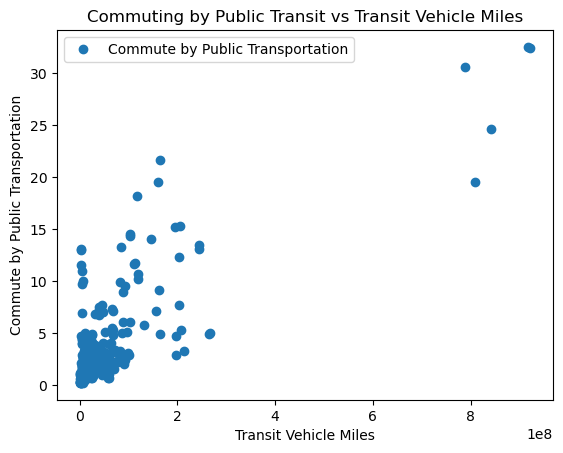

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_commuter_transit_big.plot(x = 'Transit Vehicle Miles', y='Commute by Public Transportation',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Commuting by Public Transit vs Transit Vehicle Miles')  
plt.xlabel('Transit Vehicle Miles')  
plt.ylabel('Commute by Public Transportation')  
plt.show()

### 3. Data prep for regression analysis

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_commuter_transit_big['Transit Vehicle Miles'].values.reshape(-1,1)
y = df_commuter_transit_big['Commute by Public Transportation'].values.reshape(-1,1)

In [27]:
X

array([[  7530163],
       [  7559746],
       [  5790589],
       [  5885010],
       [  5814150],
       [ 11304754],
       [ 11361312],
       [ 10138695],
       [ 11669844],
       [ 12190563],
       [  9594916],
       [  9837257],
       [  6203679],
       [  7375101],
       [  8326935],
       [  5445268],
       [  5448866],
       [  4444030],
       [  4509332],
       [  4968862],
       [ 71938934],
       [ 73095466],
       [ 61236207],
       [ 59804620],
       [ 58984431],
       [ 26831433],
       [ 27896657],
       [ 22714807],
       [ 22725709],
       [ 23018055],
       [  4374959],
       [  4517900],
       [  3668864],
       [  3717250],
       [  3749765],
       [ 66802651],
       [ 68827136],
       [ 48260515],
       [ 50439749],
       [ 60960903],
       [  3930254],
       [  3902630],
       [  3061179],
       [  2999687],
       [  3145660],
       [  4729079],
       [  4751329],
       [  3494399],
       [  3358700],
       [  3184651],


In [28]:
y

array([[ 2. ],
       [ 1.2],
       [ 1.3],
       [ 1. ],
       [ 0.7],
       [ 5. ],
       [ 4.8],
       [ 4.7],
       [ 2.9],
       [ 3.7],
       [ 1.6],
       [ 1.7],
       [ 1.4],
       [ 0.5],
       [ 1.2],
       [ 1.9],
       [ 1.8],
       [ 1.7],
       [ 1. ],
       [ 1.7],
       [ 3.4],
       [ 3.2],
       [ 3.1],
       [ 1.1],
       [ 1.6],
       [ 2.2],
       [ 2.3],
       [ 2. ],
       [ 0.9],
       [ 1.3],
       [ 1.1],
       [ 1.4],
       [ 0.9],
       [ 0.2],
       [ 0.4],
       [ 7.3],
       [ 7.1],
       [ 7. ],
       [ 3.2],
       [ 3.9],
       [ 1.1],
       [ 0.9],
       [ 0.9],
       [ 0.9],
       [ 0.6],
       [ 0.7],
       [ 0.7],
       [ 0.7],
       [ 0.3],
       [ 0.5],
       [14.3],
       [14.5],
       [13.3],
       [ 6.1],
       [ 8.9],
       [ 0.2],
       [10. ],
       [11. ],
       [ 9.7],
       [ 4.4],
       [ 6.9],
       [ 3.5],
       [ 3.5],
       [ 3.4],
       [ 3. ],
       [ 3.2],
       [ 0

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 4. Regression analysis

In [37]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

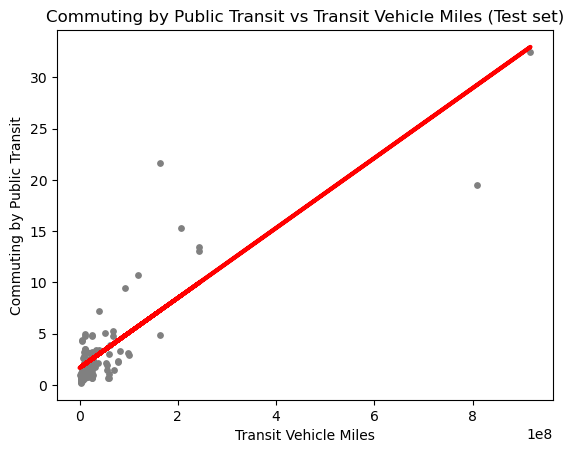

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Commuting by Public Transit vs Transit Vehicle Miles (Test set)')
plot_test.xlabel('Transit Vehicle Miles')
plot_test.ylabel('Commuting by Public Transit')
plot_test.show()

#### Regression Line takeaways
From the above plot, the line seems to be a good fit for the data. There are definitely some values that are a distance from the line but the larger values do still fit the regression line. 

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.41142905e-08]]
Mean squared error:  5.193582392403618
R2 score:  0.7285100130564133


In [43]:
y_predicted

array([[ 9.98015905],
       [ 2.0603256 ],
       [ 2.03383616],
       [ 3.64326048],
       [ 1.99867344],
       [ 7.27737493],
       [ 2.21146354],
       [ 2.5238334 ],
       [ 2.21090615],
       [ 3.70407422],
       [ 2.74812326],
       [ 1.74976643],
       [ 1.73950762],
       [ 2.19569773],
       [ 2.49780692],
       [ 1.86581441],
       [ 3.03245884],
       [ 3.9661303 ],
       [ 2.05505191],
       [ 1.87802402],
       [ 1.864965  ],
       [ 1.86248964],
       [ 3.68954637],
       [ 1.66746881],
       [ 2.05312247],
       [ 2.50423822],
       [ 2.30921746],
       [ 2.13307395],
       [ 2.03657373],
       [ 1.7688672 ],
       [ 1.83804992],
       [ 2.79923155],
       [ 1.8331102 ],
       [ 8.67949891],
       [ 3.47542185],
       [ 2.03300613],
       [ 4.35260346],
       [ 1.7834183 ],
       [ 2.05303838],
       [ 1.82130147],
       [ 1.79883609],
       [ 2.05812701],
       [ 1.98951965],
       [ 1.91218556],
       [ 2.28917754],
       [ 4

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,13.1,9.980159
1,1.1,2.060326
2,2.2,2.033836
3,0.7,3.643260
4,0.7,1.998673
5,21.6,7.277375
6,2.1,2.211464
7,3.2,2.523833
8,1.2,2.210906
9,3.0,3.704074


#### Final thoughts
Overall, I believe the regression line was a good fit for the data. The trouble stems from how some urban areas may have the same level of transit vehicle miles but have different levels of commuter public transportation usage. 

For this dataset, I believe historical bias of the pandemic could have affected some public transportation commuter mode share. In the future, I would gather more data from past years such as 2015-2017 so that the data was less skewed by the influence of the pandemic. 